In [ ]:
import numpy as np

date = "mother_folder"
dl_folder = f"base_path/{date}_DL"

look_frame = 30
models = 5

In [ ]:
# set time frames

fs = 20

# start time
start_value = -1.5

# increase per frames
increment = 1/fs

# frames
count = look_frame+1

t = [start_value + i * increment for i in range(count)]

In [ ]:
null_dl = "null-model_dir"
ica_dl  = "true-model_dir"

null_ic = np.load(f"{dl_folder}/model_{null_dl}/{date}_{null_dl}_mean_shap_ic.npy")
null_allen = np.load(f"{dl_folder}/model_{null_dl}/{date}_{null_dl}_mean_shap_allen.npy")

ica_ic = np.load(f"{dl_folder}/model_{ica_dl}/{date}_{ica_dl}_mean_shap_ic.npy")
ica_allen = np.load(f"{dl_folder}/model_{ica_dl}/{date}_{ica_dl}_mean_shap_allen.npy")

print(null_ic.shape, null_allen.shape)
print(ica_ic.shape, ica_allen.shape)

(5, 31, 10) (5, 31, 26)
(5, 31, 10) (5, 31, 26)


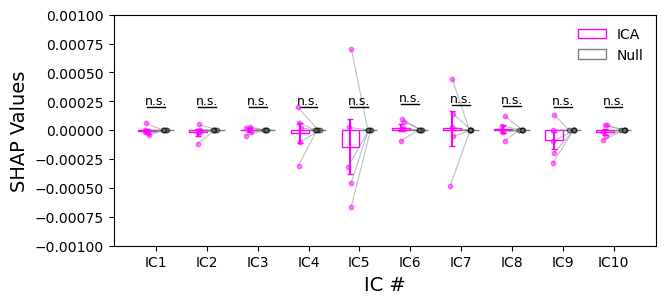

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.collections import LineCollection

start_n, end_n = 0, 10

data1 =  np.mean(ica_ic[:, start_n:end_n], axis=1).transpose()
data2 = np.mean(null_ic[:, start_n:end_n], axis=1).transpose()

n1 = data1.shape[1]
n2 = data2.shape[1]

def get_sig_label(p):
    if p > 0.05:
        return "n.s."
    elif p > 0.01:
        return "*"
    elif p > 0.005:
        return "**"
    else:
        return "***"


p_values = []
for i in range(data1.shape[0]):
    t, p = stats.ttest_rel(data1[i], data2[i])

    p_values.append(p)


fig, ax = plt.subplots(figsize=(7, 3))

n_pairs, n = data1.shape

x = np.arange(n_pairs)
width = 0.35  

means1 = data1.mean(axis=1)
means2 = data2.mean(axis=1)

sems1 = data1.std(axis=1, ddof=1) / np.sqrt(n1)
sems2 = data2.std(axis=1, ddof=1) / np.sqrt(n2)


bars1 = ax.bar(x - width/2, means1, width, yerr=sems1, capsize=2, label='ICA' , color='none', edgecolor='magenta', alpha=1, error_kw=dict(ecolor='magenta'))
bars2 = ax.bar(x + width/2, means2, width, yerr=sems2, capsize=2, label='Null', color='none', edgecolor='gray'   , alpha=1, error_kw=dict(ecolor='gray'))

rng = np.random.default_rng(0)
jit1 = (rng.random((n_pairs, n)) - 0.5) * 0.10
jit2 = (rng.random((n_pairs, n)) - 0.5) * 0.10

for i in range(n_pairs):
    ax.scatter(np.full(n, x[i]-width/2) + jit1[i], data1[i],
               s=10, facecolors='magenta', edgecolors='magenta', alpha=0.5, zorder=3)
    ax.scatter(np.full(n, x[i]+width/2) + jit2[i], data2[i],
               s=10, facecolors='gray', edgecolors='black', alpha=0.5, zorder=3)

segments = []
for i in range(n_pairs):
    xl = (x[i] - width/2) + jit1[i]
    xr = (x[i] + width/2) + jit2[i]
    for k in range(n):
        segments.append([(xl[k], data1[i, k]), (xr[k], data2[i, k])])

lc = LineCollection(segments, colors='gray', linewidths=0.8, alpha=0.5, zorder=2)
ax.add_collection(lc) 

# 有意差バー & ラベル
y_max = max(ax.get_ylim()[1], (np.maximum(means1, means2) + 0.4).max())

ax.set_ylim(-0.001, 0.001)

for i in range(n_pairs):
    p = p_values[i]
    label = get_sig_label(p)

    x1 = x[i] - width/2
    x2 = x[i] + width/2


    bar_max = max(bars1[i].get_height(), bars2[i].get_height())
    h = 0.000001 * (y_max) 
    y = bar_max + 0.0005 * y_max

    ax.plot(
            [x1, x2],
            [y + h, y + h],
            lw=1,
            c='black')


    ax.text((x1 + x2)/2,
            y + h + 0.000005 * y_max,
            label,
            ha='center',
            va='bottom',
            fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels([f'IC{i+1}' for i in range(n_pairs)], rotation=0)
ax.set_xlabel('IC #', fontsize=14)
ax.set_ylabel('SHAP Values', fontsize=14)
ax.legend(frameon=False)
plt.show()

In [31]:
# 許可する文字
roi_names = np.array([' VISp_R  ', ' VISam_R ', ' VISa_R  ', ' VISpm_R ',
                 'SSp-ul_R ', 'SSp-ll_R ', 'SSp-tr_R ',
                 'RSPagl_R ', ' RSPd_R  ', ' RSPv_R  ',
                 ' ACAd_R  ',
                 '  MOs_R  ', '  MOp_R  ',
                 '  MOp_L  ', '  MOs_L  ',
                 ' ACAd_L  ',
                 ' RSPv_L  ', ' RSPd_L  ', 'RSPagl_L ',
                 'SSp-tr_L ', 'SSp-ll_L ', 'SSp-ul_L ',
                 ' VISpm_L ', ' VISa_L  ', ' VISam_L ', ' VISp_L  '
                 ])

print(roi_names.shape)

(26,)


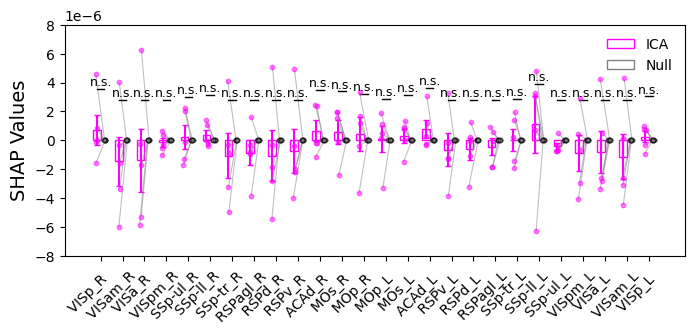

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.collections import LineCollection
import matplotlib.transforms as mtransforms


start_n, end_n = 0, 10

data1 =  np.mean(ica_allen[:, start_n:end_n], axis=1).transpose()
data2 = np.mean(null_allen[:, start_n:end_n], axis=1).transpose()


n1 = data1.shape[1]
n2 = data2.shape[1]


def get_sig_label(p):
    if p > 0.05:
        return "n.s."
    elif p > 0.01:
        return "*"
    elif p > 0.005:
        return "**"
    else:
        return "***"

p_values = []
for i in range(data1.shape[0]):
    t, p = stats.ttest_rel(data1[i], data2[i])
    p_values.append(p)

fig, ax = plt.subplots(figsize=(8, 3))

n_pairs, n = data1.shape

x = np.arange(n_pairs)
width = 0.35  

means1 = data1.mean(axis=1)
means2 = data2.mean(axis=1)

sems1 = data1.std(axis=1, ddof=1) / np.sqrt(n1)
sems2 = data2.std(axis=1, ddof=1) / np.sqrt(n2)

bars1 = ax.bar(x - width/2, means1, width, yerr=sems1, capsize=2, label='ICA' , color='none', edgecolor='magenta', alpha=1, error_kw=dict(ecolor='magenta'))
bars2 = ax.bar(x + width/2, means2, width, yerr=sems2, capsize=2, label='Null', color='none', edgecolor='gray'   , alpha=1, error_kw=dict(ecolor='gray'))


rng = np.random.default_rng(0)
jit1 = (rng.random((n_pairs, n)) - 0.5) * 0.10
jit2 = (rng.random((n_pairs, n)) - 0.5) * 0.10


for i in range(n_pairs):
    ax.scatter(np.full(n, x[i]-width/2) + jit1[i], data1[i],
               s=10, facecolors='magenta', edgecolors='magenta', alpha=0.5, zorder=3)
    ax.scatter(np.full(n, x[i]+width/2) + jit2[i], data2[i],
               s=10, facecolors='gray', edgecolors='black', alpha=0.5, zorder=3)


segments = []
for i in range(n_pairs):
    xl = (x[i] - width/2) + jit1[i]
    xr = (x[i] + width/2) + jit2[i]
    for k in range(n):
        segments.append([(xl[k], data1[i, k]), (xr[k], data2[i, k])])

lc = LineCollection(segments, colors='gray', linewidths=0.8, alpha=0.5, zorder=2)
ax.add_collection(lc)

y_max = max(ax.get_ylim()[1], (np.maximum(means1, means2) + 0.4).max())
ax.set_ylim(-0.000008, 0.000008)

for i in range(n_pairs):
    p = p_values[i]
    label = get_sig_label(p)
    x1 = x[i] - width/2
    x2 = x[i] + width/2

    bar_max = max(bars1[i].get_height(), bars2[i].get_height())
    h = 0.000001 * (y_max) 
    y = bar_max + 0.000006 * y_max

    ax.plot(
            [x1, x2],
            [y + h, y + h],
            lw=1,
            c='black')

    ax.text((x1 + x2)/2,
            y + h + 0.00000005 * y_max,
            label,
            ha='center',
            va='bottom',
            fontsize=9)

ax.set_xticks(x)

ax.set_xticklabels(roi_names, rotation=45)

dx_pt = -8  
offset = mtransforms.ScaledTranslation(dx_pt/72, 0, fig.dpi_scale_trans)  
for lab in ax.get_xticklabels():
    lab.set_transform(lab.get_transform() + offset)
ax.set_ylabel('SHAP Values', fontsize=14)
ax.legend(frameon=False)
plt.show()


